In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     year country  population
0    1950     aus     8176754
1    1950     fji      309547
2    1950     rus   103392367
3    1950     swe     7016576
4    1950     usa   154202691
..    ...     ...         ...
750  2100     aus    43143684
751  2100     fji      879393
752  2100     rus   126386512
753  2100     swe    11366901
754  2100     usa   421278894

[755 rows x 3 columns]


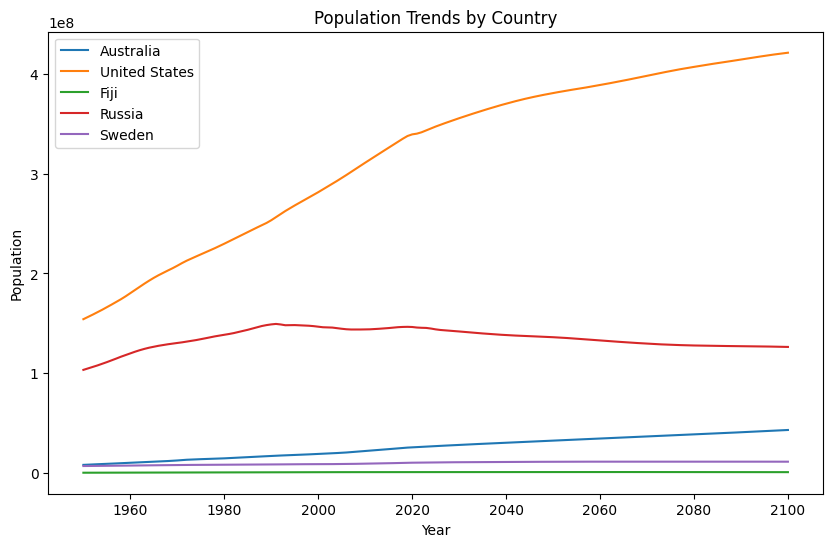

In [85]:
# Choose 5 countries to compare
df_aus = pd.read_csv('/Users/ritikabatte02/07-visualization-ritikabatte/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-aus--age--gender--year.csv')
df_usa = pd.read_csv('/Users/ritikabatte02/07-visualization-ritikabatte/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_fgi = pd.read_csv('/Users/ritikabatte02/07-visualization-ritikabatte/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-fji--age--gender--year.csv')
df_rus = pd.read_csv('/Users/ritikabatte02/07-visualization-ritikabatte/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-rus--age--gender--year.csv')
df_swe = pd.read_csv('/Users/ritikabatte02/07-visualization-ritikabatte/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv')

# Combine the data into a single df
df = pd.concat([df_aus, df_usa, df_fgi, df_rus, df_swe])

# Calculate the total population by country for each year, take out age and gender
df_totalpop = df.groupby(['year', 'country'])['population'].sum().reset_index()
print(df_totalpop)

# Create a line plot showing population trends 
plt.figure(figsize=(10, 6)) 
plt.title('Population Trends by Country')
plt.xlabel('Year')
plt.ylabel('Population')
plt.plot(df_totalpop[df_totalpop['country'] == 'aus']['year'], df_totalpop[df_totalpop['country'] == 'aus']['population'], label='Australia')
plt.plot(df_totalpop[df_totalpop['country'] == 'usa']['year'], df_totalpop[df_totalpop['country'] == 'usa']['population'], label='United States')
plt.plot(df_totalpop[df_totalpop['country'] == 'fji']['year'], df_totalpop[df_totalpop['country'] == 'fji']['population'], label='Fiji')
plt.plot(df_totalpop[df_totalpop['country'] == 'rus']['year'], df_totalpop[df_totalpop['country'] == 'rus']['population'], label='Russia')
plt.plot(df_totalpop[df_totalpop['country'] == 'swe']['year'], df_totalpop[df_totalpop['country'] == 'swe']['population'], label='Sweden')
plt.legend()
plt.show()






/var/folders/0p/mhfw5nc90kb12y_k1y5ml67r0000gp/T/ipykernel_68463/48732258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = labels, right=False)
/var/folders/0p/mhfw5nc90kb12y_k1y5ml67r0000gp/T/ipykernel_68463/48732258.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df_filter.groupby(['year', 'age_group'])['population'].sum().unstack()


<Figure size 1200x800 with 0 Axes>

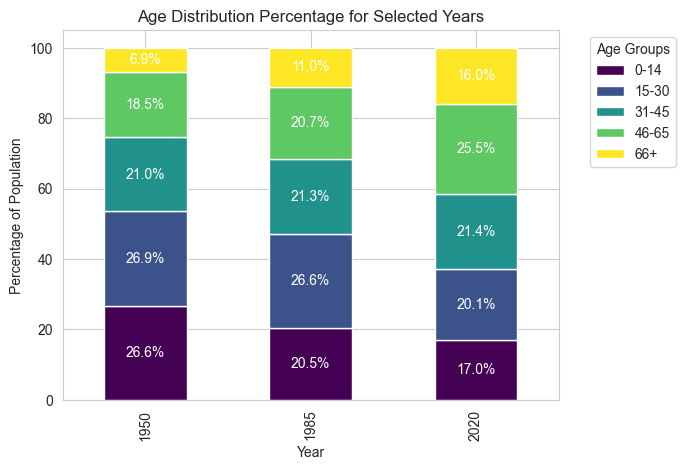

In [97]:
# Filtering age distributions for 1950, 1985, and 2020 
bins = [0, 14, 30, 45, 65, 120]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']
years_specified = [1950, 1985, 2020]
df_filter = df[df['year'].isin(years_specified)]

#new column called age_group
df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = labels, right=False)

age_distribution = df_filter.groupby(['year', 'age_group'])['population'].sum().unstack()

# Percentage of population in each age group
total_age = age_distribution.sum(axis=1)
percentages = age_distribution.apply(lambda row: row / total_age[row.name] * 100, axis=1)

# Create a stacked bar plot
plt.figure(figsize=(12, 8)) 
ax = percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Age Distribution Percentage for Selected Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels to the plot
for i in range(len(percentages)):
    for j, age_group in enumerate(percentages.columns):
        total = percentages.iloc[i].sum()
        if total > 0: 
            percentage_value = percentages.iloc[i][age_group]
            ax.text(i, percentages.iloc[i].cumsum()[age_group] - (percentage_value / 2),
                    f'{percentage_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

/var/folders/0p/mhfw5nc90kb12y_k1y5ml67r0000gp/T/ipykernel_68463/3869641131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['age_group'] = pd.cut(df_population['age'], bins=bins, labels=labels, right=False)
/var/folders/0p/mhfw5nc90kb12y_k1y5ml67r0000gp/T/ipykernel_68463/3869641131.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap = df_population.groupby(['country', 'age_group'])['population'].sum().unstack()


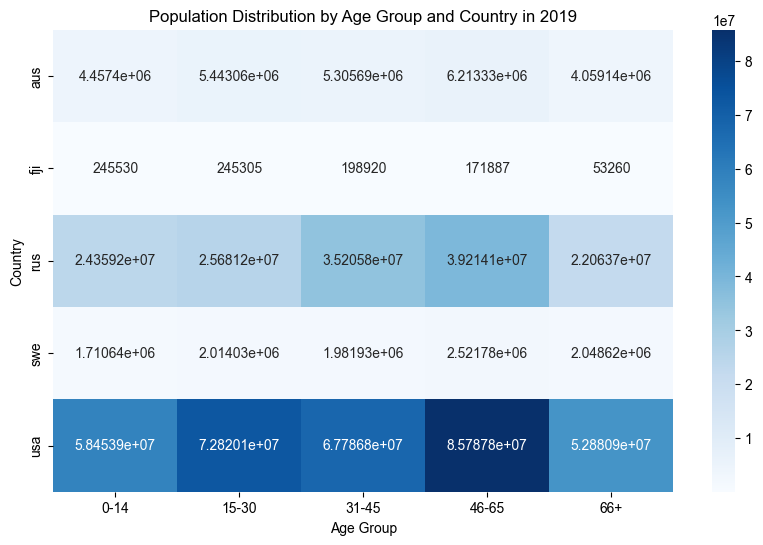

In [90]:

countries = ['aus', 'usa', 'fji', 'rus', 'swe']
year = 2019
df_population = df[(df['year'] == year) & (df['country'].isin(countries))]

bins = [0, 14, 30, 45, 65, 100]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']
df_population['age_group'] = pd.cut(df_population['age'], bins=bins, labels=labels, right=False)
heatmap = df_population.groupby(['country', 'age_group'])['population'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, cmap='Blues', annot=True, fmt='g')
sns.set_style('whitegrid')
sns.color_palette('husl', 8)
plt.title('Population Distribution by Age Group and Country in 2019')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.show()

The heatmap reveals distinct populations across 5 different countries in 2019. The US has the highest population in each age group, especially around 15-30 and 46-65. Russia and Australia have balanced distributions. Fiji has the smallest population across all age groups. Overall, most countries have peak populations in the middle age groups. 

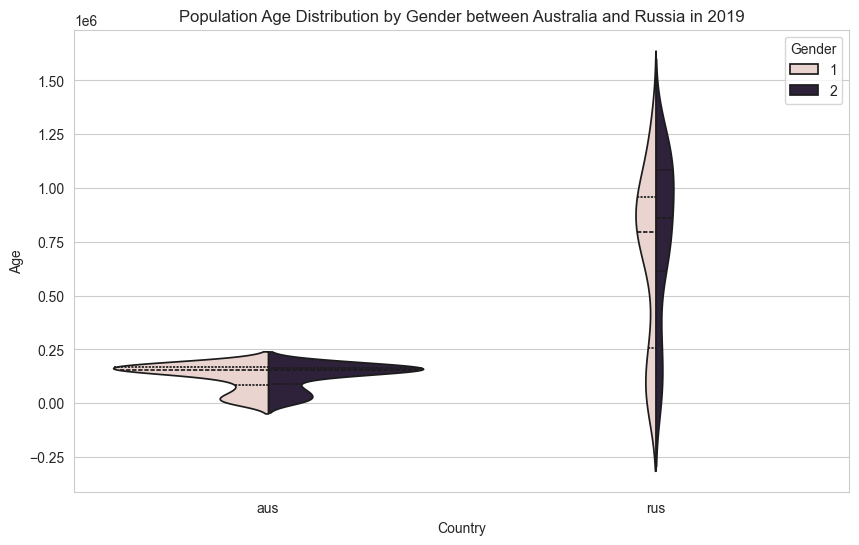

In [107]:
countries = ['aus', 'rus']
year = 2019

df_filter = df[(df['year'] == year) & (df['country'].isin(countries))]

# Create violin plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.violinplot(x='country', y='population', hue='gender', data=df_filter, split=True, inner='quartile')
plt.title('Population Age Distribution by Gender between Australia and Russia in 2019')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title = 'Gender')
plt.show()

The violin plot shows the population age distribution by gender for Australia and Russia in 2019. Australia has a narrow distribution thus meaning a smaller population size with a balanced distribution across genders. However, Russia has a wider distribution so larger population size and age range. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

<Figure size 1000x600 with 0 Axes>

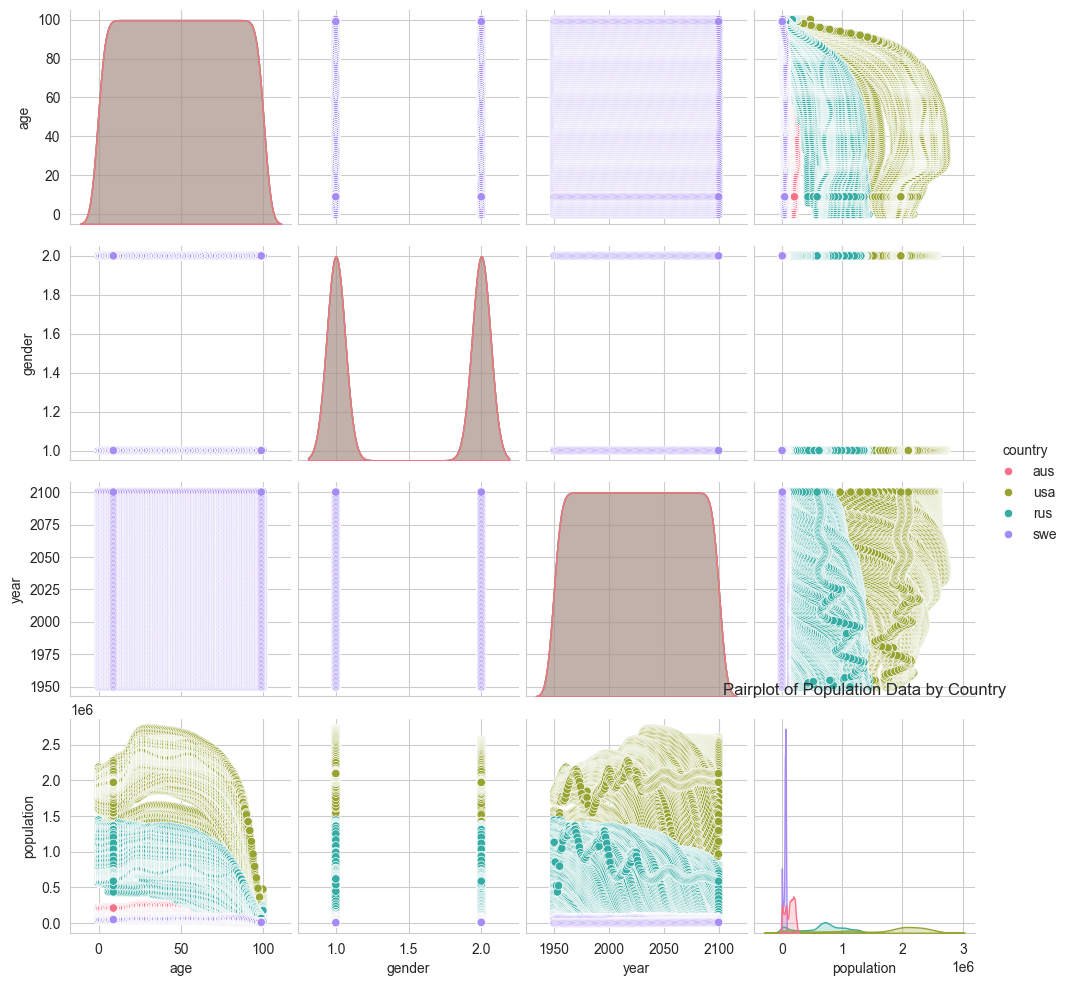

In [109]:
countries = ['aus', 'rus', 'swe', 'usa']  
filter_df = df[df['country'].isin(countries)]

# Create a pairplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.pairplot(filter_df, hue='country', palette='husl')
plt.title('Pairplot of Population Data by Country')
plt.show()

The pair plot shows a multidimensional view of population data by country, examining relationships among age, gender, year, and population size. The diagonal histograms reveal the distribution patterns for each variable. For example, the age distribution is fairly consistent across countries, showing a wide spread from 0 to 100 years. Population size varies significantly, with the U.S. having a notably larger population, followed by Russia, while smaller populations are observed for Australia and Sweden.